In [1]:
# !pip install markupsafe==2.0.1 Jinja2

In [2]:
# Import libraries
import pandas as pd
import kaggle
from pycaret.classification import *

In [3]:
data = "../data/"

In [4]:
# download Telco Customer Churn Prediction dataset from kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('blastchar/telco-customer-churn', path=data, unzip=True)

In [5]:
# read the data
df = pd.read_csv(data + 'WA_Fn-UseC_-Telco-Customer-Churn.csv')
# view the data
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# get the spread of the target variable
df['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [8]:
# get the list of columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# Assign target to variable
target = 'Churn'

#convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce').fillna(0)

# identify columns to ignore
ignored = 'customerID'
# Identify categorical features
cat_features = [col for col in df.columns 
                if col != target 
                and col != ignored 
                and not pd.api.types.is_numeric_dtype(df[col])
                or (col != target and pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique() < 5)
                ]

numeric_features = [col for col in df.columns
                   if col not in target and col not in ignored and col not in cat_features]

# view categorical features
cat_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [10]:
numeric_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [11]:
experiment = setup(data=df, target= target, categorical_features=cat_features,
                    numeric_features = numeric_features,
                    ignore_features=ignored,
                    session_id=40)

,Description,Value
0,Session id,40
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(4930, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Ignore features,10
9,Ordinal features,6


In [12]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8065,0.8475,0.8065,0.7991,0.8007,0.4769,0.4807,0.7640
ridge,Ridge Classifier,0.8039,0.0000,0.8039,0.7946,0.7958,0.4605,0.4668,0.1630
lda,Linear Discriminant Analysis,0.8018,0.8392,0.8018,0.7947,0.7967,0.4679,0.4706,0.1660
ada,Ada Boost Classifier,0.8016,0.8472,0.8016,0.7927,0.7944,0.4581,0.4631,0.2990
gbc,Gradient Boosting Classifier,0.8010,0.8470,0.8010,0.7921,0.7937,0.4561,0.4613,0.5510
lightgbm,Light Gradient Boosting Machine,0.7966,0.8359,0.7966,0.7882,0.7901,0.4486,0.4525,0.4060
xgboost,Extreme Gradient Boosting,0.7899,0.8276,0.7899,0.7814,0.7837,0.4324,0.4358,0.5670
rf,Random Forest Classifier,0.7872,0.8243,0.7872,0.7760,0.7784,0.4145,0.4199,0.4530
et,Extra Trees Classifier,0.7771,0.7970,0.7771,0.7657,0.7688,0.3903,0.3946,0.4470
knn,K Neighbors Classifier,0.7594,0.7444,0.7594,0.7449,0.7489,0.3354,0.3404,0.2130


In [13]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [15]:
get_config('X_train_transformed')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,...,Contract_Two year,Contract_Month-to-month,Contract_One year,PaperlessBilling,PaymentMethod_Mailed check,PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic),PaymentMethod_Bank transfer (automatic),MonthlyCharges,TotalCharges
2661,0.0,0.0,0.0,0.0,66.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,47.400002,3177.250000
4749,1.0,0.0,0.0,0.0,5.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,49.200001,216.899994
967,1.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,20.850000,60.650002
5738,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,20.600000,20.600000
1807,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,76.349998,76.349998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4010,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,20.400000,20.400000
1565,0.0,0.0,0.0,0.0,55.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,81.550003,4509.500000
4265,1.0,1.0,1.0,0.0,66.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,100.050003,6871.899902
6511,0.0,0.0,1.0,1.0,63.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,50.650002,3221.250000


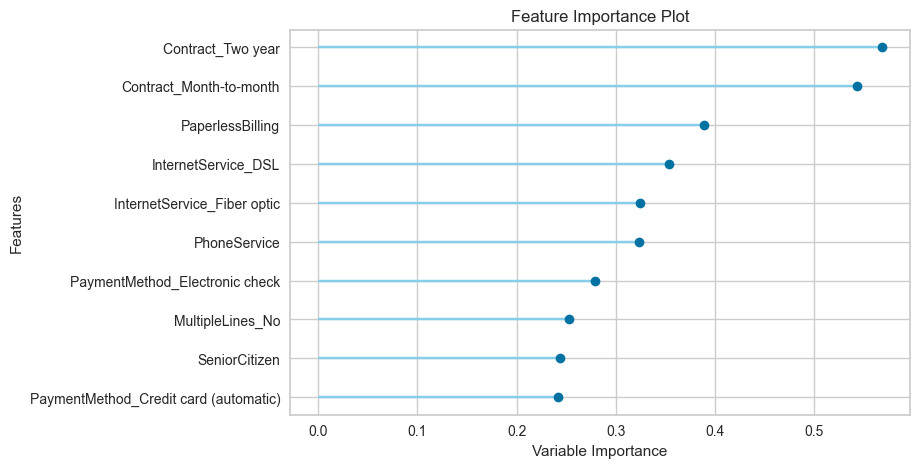

In [16]:
# plot feature importance
plot_model(best_model, plot = 'feature')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7951,0.8379,0.7951,0.7911,0.7928,0.4633,0.4638


,Samples,Accuracy,Recall,Precision,F1,Kappa,MCC,Selection Rate
gender,,,,,,,,
Female,1072,0.79291,0.79291,0.786493,0.788796,0.461626,0.463203,0.0
Male,1041,0.79731,0.79731,0.796567,0.796931,0.465274,0.465287,0.0


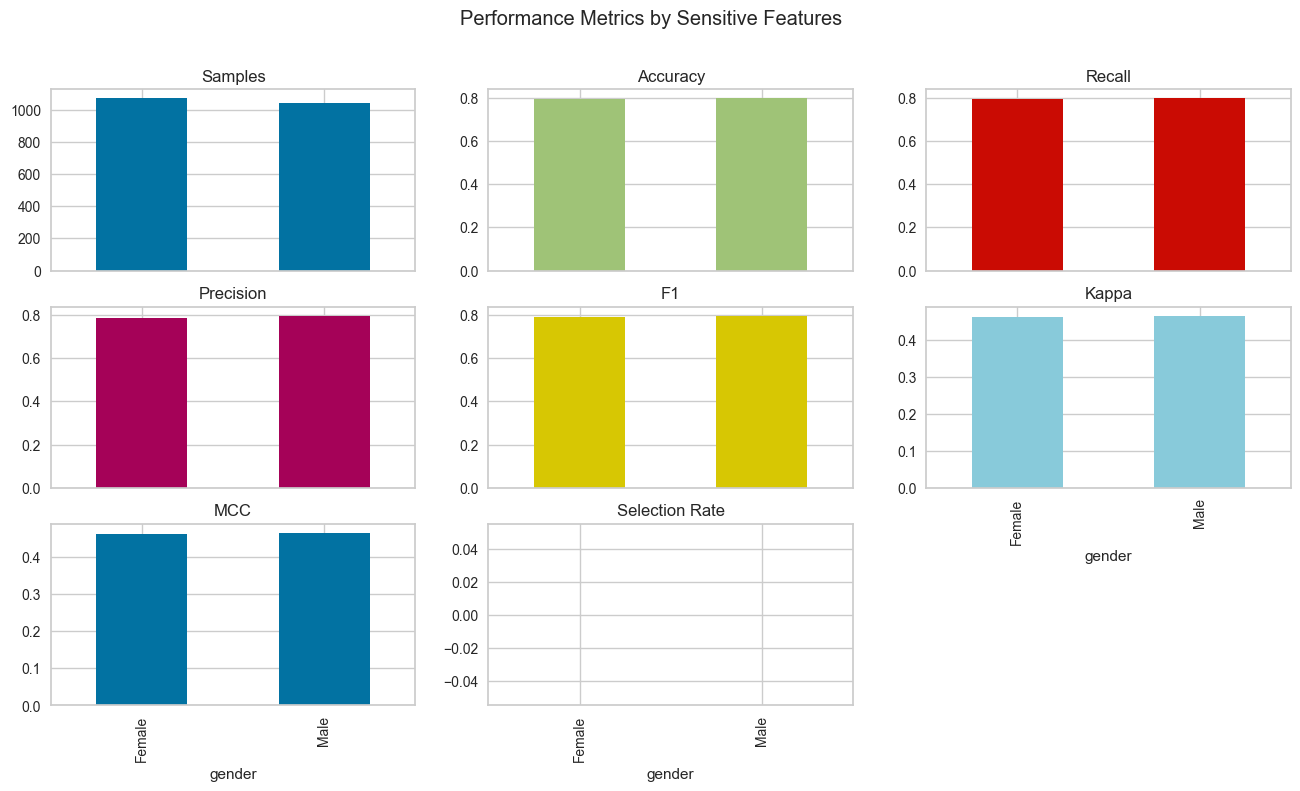

In [17]:
# check fairness
check_fairness(best_model, sensitive_features = ['gender'])

In [18]:
# save model
save_model(best_model, 'my_telco_churn_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'MonthlyCharges',
                                              'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                 